In [12]:
import numpy as np
import matplotlib.pyplot as plt

## TP6 :

In [17]:
def simulation_w1_w2(T , N , rho):
    incr_1 = np.sqrt(T/N)*np.random.randn(N)
    W_1 = np.concatenate(([0.] ,np.cumsum(incr_1)))
    
    incr_2 = np.sqrt(T/N)*np.random.randn(N)
    W_3 = np.concatenate(([0.] ,np.cumsum(incr_2)))
    
    W_2 = rho*W_1 + np.sqrt(1- rho**2)*W_3 
    
    return (W_1 , W_2)


def schema_s_v(s_0 , v_0 ,  k_v , theta , T , N , rho , sigma , r):
    
    W_1 , W_2 = simulation_w1_w2(T,N,rho)
    
    S = np.zeros(N+1)
    V = np.zeros(N+1)
    S[0]= s_0 
    V[0] = v_0
    
    for k in range(1,N+1) :
        V[k] = V[k-1] + k_v*(theta - V[k-1])*(T/N) + sigma*np.sqrt(max(V[k-1] , 0))*(W_2[k] - W_2[k-1])
        S[k] = S[k-1] + r*S[k-1]*(T/N) + np.sqrt(max(V[k-1] , 0))*S[k-1]*(W_1[k] - W_1[k-1])
        
        
    return (S,V)



def approximate_A(t , S , N) :
    res = (t/N)*(sum(S) - 0.5*(S[0] + S[N]))
    return res 
    
    
def payoff(T , S , K , N):
    
    return max((1/T)*approximate_A(T,S,N) - K , 0 )
    
    

def price_mc(M , s_0 , v_0 ,  k_v , theta , T , N , rho , sigma , r):
    
    price = 0
    for i in range(M) :
        S,V = schema_s_v(s_0 , v_0 ,  k_v , theta , T , N , rho , sigma , r)
        price += payoff(T , S , K ,N)
        
    price = price*np.exp(-r*T) / M 
    
    return price

    
    

In [21]:
r = 0.03
s_0  = 100
K = 110
T = 2
rho = -0.2
v_0 = 0.04
k_v = 2
theta = 0.04
sigma = 0.01
N = 100
M = 10000

price = price_mc(M ,s_0 , v_0 , k_v , theta , T , N , rho , sigma ,r)
print(price)

3.84327484456322


[100.          98.60006689  98.65822722  93.25764049  86.7790367
  84.14119985  81.9795626   79.61202186  80.54208308  83.97587483
  85.76144832  88.56808574  91.91824907  94.09616313  97.30683367
  98.20814481 100.37735767  98.7308215   98.84276801  96.35189317
  95.94637617  98.05512017  99.93444665 100.16633056  95.98993575
  96.31100092  95.44308887  95.46477749  94.99654408  95.34286713
  92.85456499  93.10117928  92.44343774  92.6424985   90.61809655
  95.15110184  94.24716018  88.69086667  92.31066949  93.59273507
  91.67247028  92.83384968  95.8515242   96.47791088 102.79267223
 103.52390139 103.1430643  102.31779682 106.37004412 109.62215197
 111.30833741 115.27715918 117.63572293 116.51720875 117.6998107
 120.02134265 117.78250809 114.83248954 113.52902809 115.06607989
 112.46093822 116.05108741 118.95672646 115.72031674 116.08517653
 112.81842988 116.9973704  112.61571039 118.26833153 115.51044865
 119.08248953 117.40056313 118.62115915 116.65947708 114.76654312
 118.1980538

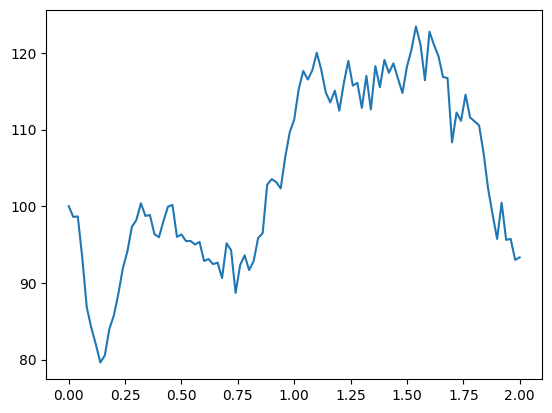

In [20]:
S, V = schema_s_v(s_0 , v_0 ,  k_v , theta , T , N , rho , sigma , r)
val_t = [k*T/N for k in range(0,N+1)]
print(S)
print(V)
plt.plot(val_t , S)